In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("temp.csv")


In [7]:
df.set_index('Date',inplace=True)
df.head()

,Temp
Date,
1743-11-01,6.068
1744-04-01,5.788
1744-05-01,10.644
1744-06-01,14.051
1744-07-01,16.082


In [8]:
df.tail()

,Temp
Date,
1832-10-01,9.056
1832-11-01,3.464
1832-12-01,2.137
1833-01-01,-1.840
1833-02-01,1.704


<Axes: xlabel='Date'>

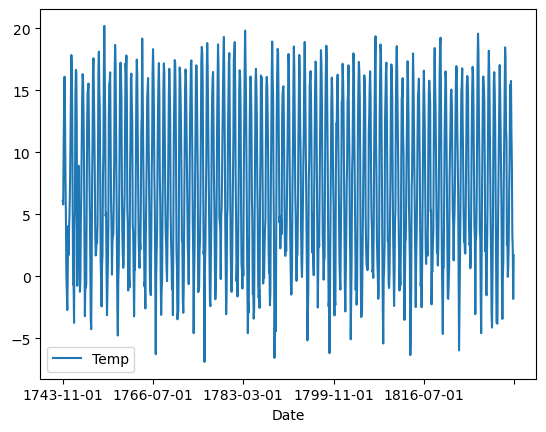

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
#augmented dickey fuller test

In [11]:
test_result=adfuller(df['Temp'])
#H0--> non stationary
#H1--> stationary

In [41]:
def adfuller_test(Temp):
    result=adfuller(df['Temp'])
    labels=['ADF test stats','p-value', '#lags used','no of observations used']
    for value,label in zip(result,labels):
        print(label + ':' + str(value))
    if (result[1]<=0.05):
        print("strong evidence against null hypothesis(H0), reject null hypothesis, Data is stationary")
    else: 
        print("weak evidence against null hypothesis(H0), Data is non stationary")
        

In [43]:
adfuller_test(df['Temp'])

ADF test stats:-5.638411951120695
p-value:1.0500609437019235e-06
#lags used:22
no of observations used:977
strong evidence against null hypothesis(H0), reject null hypothesis, Data is stationary


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

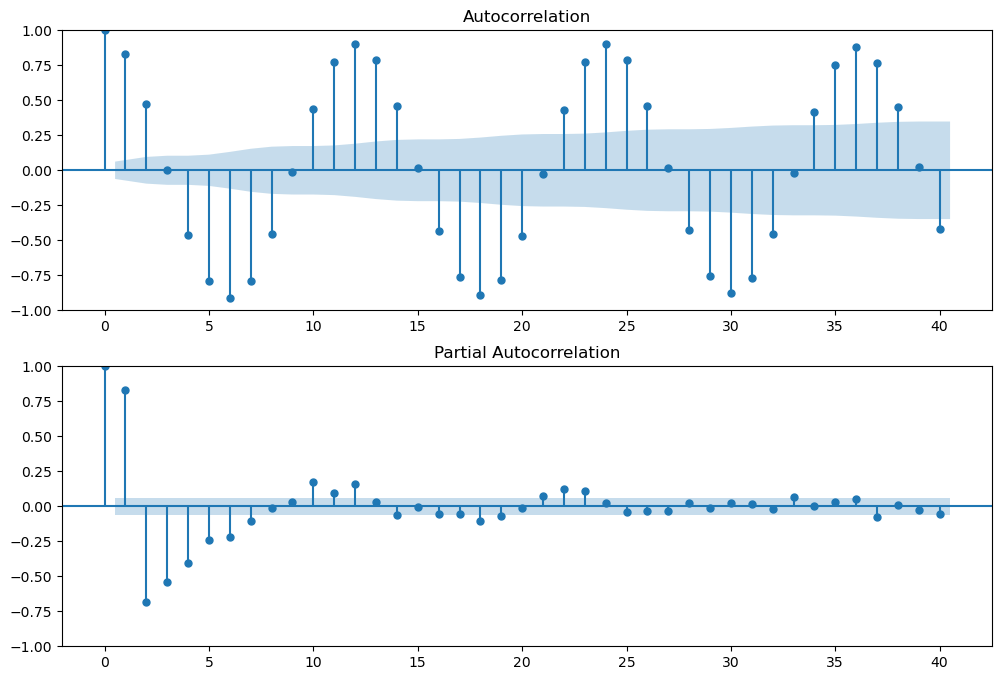

In [15]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Temp'],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df['Temp'],lags=40,ax=ax2)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


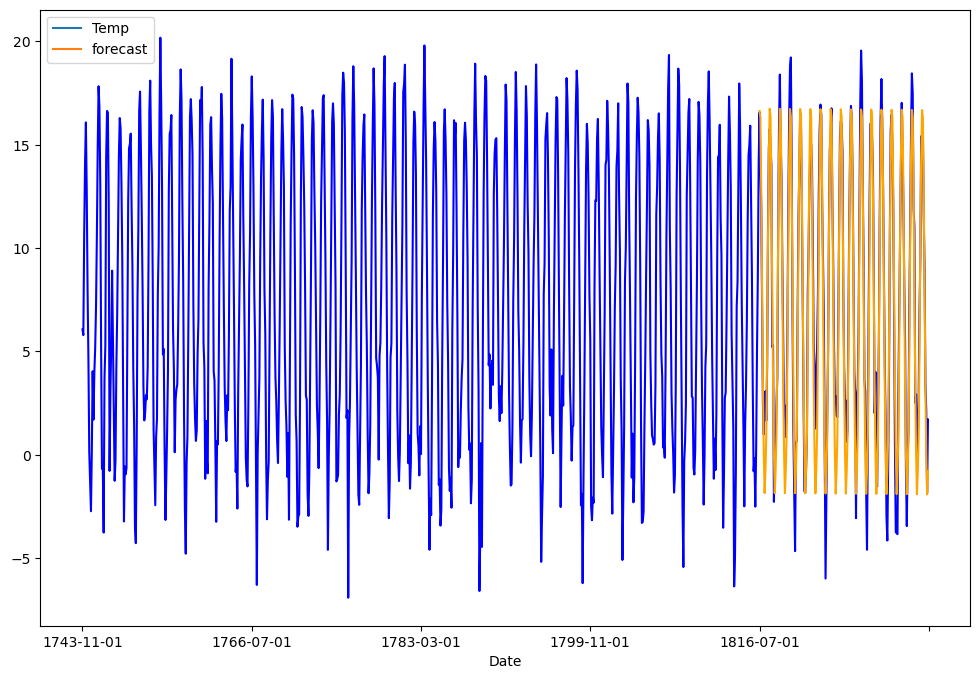

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit your SARIMAX model
model = SARIMAX(df['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Generate forecast for the last 200 values
start = len(df) - 200
end = len(df) - 1  # Forecasting from the 200th last to the last data point
forecast_values = result.predict(start=start, end=end, dynamic=True)

# Add the forecast values to the DataFrame
df['forecast'] = None  # Initialize the forecast column with NaN
df.iloc[start:end + 1, df.columns.get_loc('forecast')] = forecast_values  # Use .iloc for positional indexing

# Plotting the 'Temp' and 'forecast' columns
ax = df[['Temp', 'forecast']].plot(figsize=(12, 8))

# Customize the colors
ax.get_lines()[0].set_color('blue')  # Temp in blue
ax.get_lines()[1].set_color('orange')  # Forecast in orange

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Future Predictions:
 1000     3.202573
1001     6.916098
1002    11.330899
1003    15.482118
1004    16.976986
1005    16.195525
1006    12.727500
1007     8.721769
1008     3.572189
1009     1.230201
1010    -1.602761
1011    -0.408914
Name: predicted_mean, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


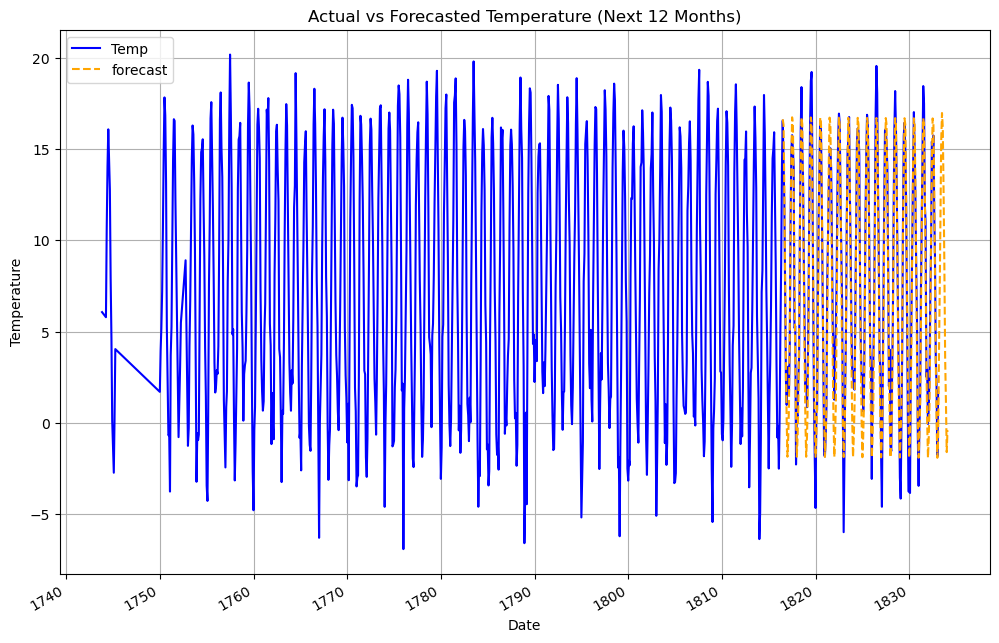

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure index is in datetime format
df.index = pd.to_datetime(df.index)

# Fit SARIMAX model
model = SARIMAX(df['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Generate future dates for the next 12 months
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 13)]
future_datest_df = pd.DataFrame(index=future_dates)

# Predict future values for the next 12 months
start = len(df)
end = len(df) + 11  # Predict next 12 months

future_predictions = result.predict(start=start, end=end, dynamic=True)

# Debugging: Print values to check
print("Future Predictions:\n", future_predictions)

# Add forecasted values to the future DataFrame
future_datest_df['forecast'] = future_predictions.values

# Combine with original data
future_df = pd.concat([df, future_datest_df])

# Plot actual and forecasted data
ax = future_df[['Temp']].plot(figsize=(12, 8), color="blue", label="Actual Temp")
future_df[['forecast']].plot(ax=ax, color="orange", label="Forecasted Temp", linestyle="dashed")

# Show the plot
plt.title("Actual vs Forecasted Temperature (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pre

Future Predictions:
 1000     3.202573
1001     6.916098
1002    11.330899
1003    15.482118
1004    16.976986
1005    16.195525
1006    12.727500
1007     8.721769
1008     3.572189
1009     1.230201
1010    -1.602761
1011    -0.408914
1012     2.037685
1013     6.274966
1014    10.976332
1015    15.288950
1016    16.869147
1017    16.138425
1018    12.696459
1019     8.707158
1020     3.565236
1021     1.228915
1022    -1.602868
1023    -0.404961
1024     2.041311
1025     6.278412
1026    10.979682
1027    15.292242
1028    16.872412
1029    16.141671
1030    12.699697
1031     8.710388
1032     3.568464
1033     1.232140
1034    -1.599642
1035    -0.401739
1036     2.044535
1037     6.281636
1038    10.982906
1039    15.295467
1040    16.875636
1041    16.144896
1042    12.702922
1043     8.713613
1044     3.571689
1045     1.235365
1046    -1.596417
1047    -0.398514
1048     2.047760
1049     6.284861
1050    10.986131
1051    15.298691
1052    16.878861
1053    16.148120
1054   

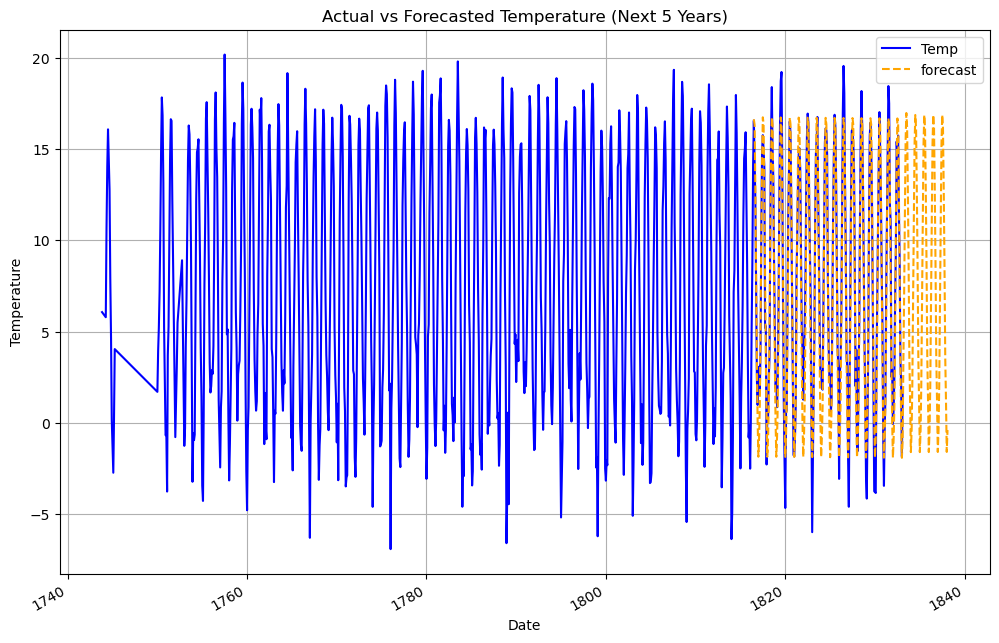

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure index is in datetime format
df.index = pd.to_datetime(df.index)

# Fit SARIMAX model
model = SARIMAX(df['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Generate future dates for the next 5 years (60 months)
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 61)]
future_datest_df = pd.DataFrame(index=future_dates)

# Predict future values for the next 5 years
start = len(df)
end = len(df) + 59  # Predict next 60 months

future_predictions = result.predict(start=start, end=end)

# Debugging: Print values to check
print("Future Predictions:\n", future_predictions)

# Add forecasted values to the future DataFrame
future_datest_df['forecast'] = future_predictions.values

# Combine with original data
future_df = pd.concat([df, future_datest_df])

# Plot actual and forecasted data
ax = future_df[['Temp']].plot(figsize=(12, 8), color="blue", label="Actual Temp")
future_df[['forecast']].plot(ax=ax, color="orange", label="Forecasted Temp", linestyle="dashed")

# Show the plot
plt.title("Actual vs Forecasted Temperature (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()


In [19]:
import time
# Start time
start_time_sarima = time.time()

# Fit SARIMAX model
model = SARIMAX(df['Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit(disp=False)

# Predict future values for the next 5 years
future_predictions = result.predict(start=len(df), end=len(df) + 59)

# End time
end_time_sarima = time.time()

# Compute time taken
sarima_time = end_time_sarima - start_time_sarima
print(f"SARIMA Computation Time: {sarima_time:.4f} seconds")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA Computation Time: 3.0846 seconds


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np# Get in-sample predictions
train_pred_sarima = result.fittedvalues

# Compute accuracy metrics
mae_sarima = mean_absolute_error(df['Temp'].dropna(), train_pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(df['Temp'].dropna(), train_pred_sarima))
r2_sarima = r2_score(df['Temp'].dropna(),train_pred_sarima) 
print(f"SARIMA MAE: {mae_sarima:.4f}")
print(f"SARIMA RMSE: {rmse_sarima:.4f}")
print(f"SARIMA R²: {r2_sarima:.4f}")

SARIMA MAE: 1.5398
SARIMA RMSE: 2.0988
SARIMA R²: 0.9036
